# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 50., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

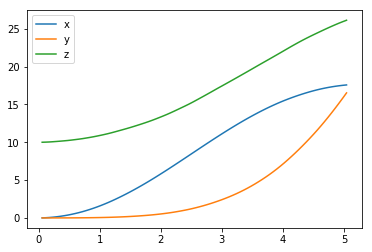

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

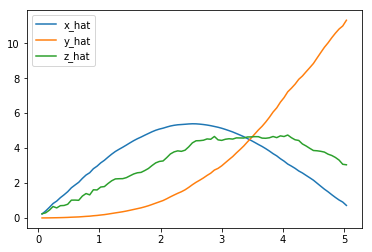

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

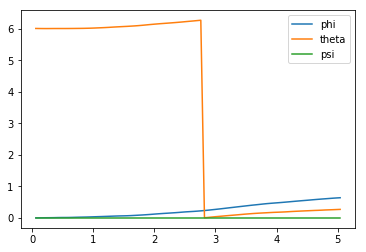

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

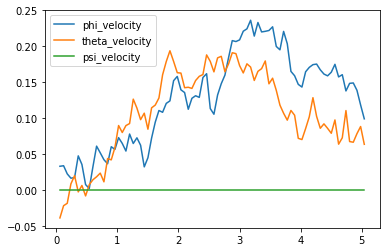

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

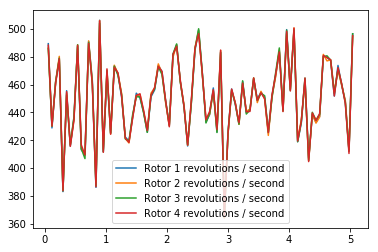

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[17.58628938 16.53338225 26.14242073  0.64077242  0.27080832  0.        ]
[ 0.71642017 11.32038103  3.0426979 ]
[0.09904759 0.06361667 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   2.280 (best =   2.281), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [16]:
%reload_ext autoreload
%autoreload 2

import sys
import pandas as pd
from agents.agent import Agent
from task import Task

num_episodes = 1000
best_score = -100
target_pos = np.array([0., 0., 50.])
task = Task(target_pos=target_pos)
agent = Agent(task) 

rewards = []
stats = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score, score)
             
        if done:
            print("\r{:4d}. score: {:8.3f} best: {:8.3f} pos: ({:8.2f},{:8.2f},{:8.2f})".format(
                i_episode, 
                score, 
                best_score, 
                task.sim.pose[0],
                task.sim.pose[1],
                task.sim.pose[2]))

            break

    rewards.append(score)
    stats[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,
                        'Position':(task.sim.pose[0],task.sim.pose[1],task.sim.pose[2])}
    sys.stdout.flush()

   1. score:  100.033 best:  100.033 pos: (  -13.33,   -2.35,    0.00)
   2. score:   97.707 best:  100.033 pos: (  -18.94,  -11.64,    0.00)
   3. score:  109.571 best:  109.571 pos: (  150.00,  -84.40,   61.35)
   4. score:  186.607 best:  186.607 pos: (   -3.10,   33.37,   28.27)
   5. score:  188.156 best:  188.156 pos: (   -3.26,    4.98,   37.16)
   6. score:  187.854 best:  188.156 pos: (   -3.12,   13.61,   36.66)
   7. score:  188.105 best:  188.156 pos: (   -3.25,    6.11,   36.98)
   8. score:  188.341 best:  188.341 pos: (   -3.32,   -0.31,   37.09)
   9. score:  187.784 best:  188.341 pos: (   -3.89,    4.55,    9.00)
  10. score:   71.276 best:  188.341 pos: (   -3.11,   -0.80,    0.00)
  11. score:   64.548 best:  188.341 pos: (   -2.74,   -4.07,    0.00)
  12. score:  187.482 best:  188.341 pos: (   -3.91,   23.85,    4.68)
  13. score:  187.514 best:  188.341 pos: (   -4.24,   17.89,   15.63)
  14. score:   57.828 best:  188.341 pos: (   -2.02,    6.71,    0.00)
  15. 

 117. score:   64.574 best:  188.374 pos: (    2.93,    2.28,    0.00)
 118. score:   57.880 best:  188.374 pos: (   -3.16,    3.54,    0.00)
 119. score:   64.571 best:  188.374 pos: (   -0.82,    2.11,    0.00)
 120. score:   69.036 best:  188.374 pos: (    2.37,    3.70,    0.00)
 121. score:   66.807 best:  188.374 pos: (   -3.52,    2.58,    0.00)
 122. score:   89.106 best:  188.374 pos: (    2.14,    1.32,    0.00)
 123. score:   64.539 best:  188.374 pos: (    0.76,    5.87,    0.00)
 124. score:   82.376 best:  188.374 pos: (   -0.58,   -4.61,    0.00)
 125. score:   84.610 best:  188.374 pos: (    6.01,    0.42,    0.00)
 126. score:   64.518 best:  188.374 pos: (   -1.61,    8.43,    0.00)
 127. score:   82.299 best:  188.374 pos: (    5.50,   -5.45,    0.00)
 128. score:   82.283 best:  188.374 pos: (    7.50,   -5.31,    0.00)
 129. score:   62.335 best:  188.374 pos: (    4.34,   -2.33,    0.00)
 130. score:   69.022 best:  188.374 pos: (   -1.24,   -6.38,    0.00)
 131. 

 233. score:  188.200 best:  189.606 pos: (   -3.30,    3.45,   37.03)
 234. score:  187.996 best:  189.606 pos: (   -3.28,    8.98,   36.84)
 235. score:  187.893 best:  189.606 pos: (   -4.16,  -11.82,   17.19)
 236. score:   77.993 best:  189.606 pos: (   -2.03,    1.56,    0.00)
 237. score:   91.384 best:  189.606 pos: (   -3.53,   -2.77,    0.00)
 238. score:  126.258 best:  189.606 pos: (   -2.51,   35.22,    0.00)
 239. score:  188.322 best:  189.606 pos: (   -3.34,    0.32,   37.10)
 240. score:  188.041 best:  189.606 pos: (   -3.17,    8.29,   37.03)
 241. score:  188.016 best:  189.606 pos: (   -3.28,    8.85,   36.89)
 242. score:  188.167 best:  189.606 pos: (   -3.24,    4.67,   37.10)
 243. score:  188.052 best:  189.606 pos: (   -3.26,    8.20,   36.97)
 244. score:  188.144 best:  189.606 pos: (   -3.19,    5.43,   37.20)
 245. score:  188.344 best:  189.606 pos: (   -3.30,   -0.64,   37.01)
 246. score:  188.283 best:  189.606 pos: (   -3.39,    0.65,   37.00)
 247. 

 349. score:   64.599 best:  189.606 pos: (   -1.93,   -0.00,    0.00)
 350. score:   64.602 best:  189.606 pos: (   -1.83,   -0.02,    0.00)
 351. score:   64.601 best:  189.606 pos: (   -1.88,   -0.01,    0.00)
 352. score:   64.601 best:  189.606 pos: (   -1.78,   -0.39,    0.00)
 353. score:   64.600 best:  189.606 pos: (   -1.83,   -0.38,    0.00)
 354. score:   64.598 best:  189.606 pos: (   -1.96,   -0.03,    0.00)
 355. score:   64.599 best:  189.606 pos: (   -1.85,   -0.40,    0.00)
 356. score:   64.600 best:  189.606 pos: (   -1.83,   -0.40,    0.00)
 357. score:   64.597 best:  189.606 pos: (   -1.89,   -0.32,    0.00)
 358. score:   64.601 best:  189.606 pos: (   -2.04,    0.17,    0.00)
 359. score:   64.600 best:  189.606 pos: (   -1.90,   -0.03,    0.00)
 360. score:   64.599 best:  189.606 pos: (   -1.93,   -0.02,    0.00)
 361. score:   64.600 best:  189.606 pos: (   -1.90,   -0.01,    0.00)
 362. score:   64.602 best:  189.606 pos: (   -1.84,   -0.01,    0.00)
 363. 

 465. score:   64.598 best:  189.606 pos: (   -1.89,   -0.37,    0.00)
 466. score:   64.599 best:  189.606 pos: (   -1.85,   -0.39,    0.00)
 467. score:   64.599 best:  189.606 pos: (   -1.85,   -0.40,    0.00)
 468. score:   64.601 best:  189.606 pos: (   -1.79,   -0.40,    0.00)
 469. score:   64.598 best:  189.606 pos: (   -1.84,   -0.42,    0.00)
 470. score:   64.601 best:  189.606 pos: (   -1.87,   -0.01,    0.00)
 471. score:   64.600 best:  189.606 pos: (   -1.90,   -0.05,    0.00)
 472. score:   64.600 best:  189.606 pos: (   -1.82,   -0.39,    0.00)
 473. score:   64.602 best:  189.606 pos: (   -1.85,   -0.04,    0.00)
 474. score:   64.599 best:  189.606 pos: (   -1.93,   -0.02,    0.00)
 475. score:   64.599 best:  189.606 pos: (   -1.85,   -0.39,    0.00)
 476. score:   64.602 best:  189.606 pos: (   -1.83,   -0.01,    0.00)
 477. score:   64.602 best:  189.606 pos: (   -1.84,   -0.00,    0.00)
 478. score:   64.598 best:  189.606 pos: (   -1.85,   -0.42,    0.00)
 479. 

 581. score:   64.601 best:  189.606 pos: (   -1.89,   -0.01,    0.00)
 582. score:   64.603 best:  189.606 pos: (   -1.80,   -0.01,    0.00)
 583. score:   64.600 best:  189.606 pos: (   -1.81,   -0.38,    0.00)
 584. score:   64.601 best:  189.606 pos: (   -1.88,   -0.01,    0.00)
 585. score:   64.599 best:  189.606 pos: (   -1.87,   -0.38,    0.00)
 586. score:   64.599 best:  189.606 pos: (   -1.84,   -0.42,    0.00)
 587. score:   64.599 best:  189.606 pos: (   -1.87,   -0.40,    0.00)
 588. score:   64.601 best:  189.606 pos: (   -1.86,   -0.04,    0.00)
 589. score:   64.597 best:  189.606 pos: (   -1.90,   -0.41,    0.00)
 590. score:   64.599 best:  189.606 pos: (   -1.84,   -0.42,    0.00)
 591. score:   64.598 best:  189.606 pos: (   -1.86,   -0.40,    0.00)
 592. score:   64.600 best:  189.606 pos: (   -1.91,   -0.03,    0.00)
 593. score:   64.600 best:  189.606 pos: (   -1.90,   -0.01,    0.00)
 594. score:   64.598 best:  189.606 pos: (   -1.86,   -0.42,    0.00)
 595. 

 697. score:   64.602 best:  189.606 pos: (   -1.82,   -0.01,    0.00)
 698. score:   64.600 best:  189.606 pos: (   -1.84,   -0.36,    0.00)
 699. score:   64.598 best:  189.606 pos: (   -1.85,   -0.45,    0.00)
 700. score:   64.600 best:  189.606 pos: (   -1.89,   -0.04,    0.00)
 701. score:   64.599 best:  189.606 pos: (   -1.93,   -0.02,    0.00)
 702. score:   64.600 best:  189.606 pos: (   -1.80,   -0.39,    0.00)
 703. score:   64.600 best:  189.606 pos: (   -1.81,   -0.41,    0.00)
 704. score:   64.600 best:  189.606 pos: (   -1.82,   -0.41,    0.00)
 705. score:   64.599 best:  189.606 pos: (   -1.85,   -0.37,    0.00)
 706. score:   64.601 best:  189.606 pos: (   -1.97,    0.01,    0.00)
 707. score:   64.602 best:  189.606 pos: (   -1.84,   -0.01,    0.00)
 708. score:   64.602 best:  189.606 pos: (   -1.83,   -0.03,    0.00)
 709. score:   64.598 best:  189.606 pos: (   -1.86,   -0.42,    0.00)
 710. score:   64.602 best:  189.606 pos: (   -1.84,   -0.02,    0.00)
 711. 

 813. score:   64.601 best:  189.606 pos: (   -1.88,   -0.00,    0.00)
 814. score:   64.599 best:  189.606 pos: (   -1.85,   -0.40,    0.00)
 815. score:   64.599 best:  189.606 pos: (   -1.85,   -0.41,    0.00)
 816. score:   64.597 best:  189.606 pos: (   -1.89,   -0.42,    0.00)
 817. score:   64.600 best:  189.606 pos: (   -1.82,   -0.39,    0.00)
 818. score:   64.602 best:  189.606 pos: (   -1.85,   -0.01,    0.00)
 819. score:   64.601 best:  189.606 pos: (   -1.89,   -0.02,    0.00)
 820. score:   64.601 best:  189.606 pos: (   -1.87,   -0.01,    0.00)
 821. score:   64.601 best:  189.606 pos: (   -1.87,   -0.01,    0.00)
 822. score:   64.600 best:  189.606 pos: (   -1.90,   -0.06,    0.00)
 823. score:   64.602 best:  189.606 pos: (   -1.78,   -0.39,    0.00)
 824. score:   64.599 best:  189.606 pos: (   -1.83,   -0.40,    0.00)
 825. score:   64.600 best:  189.606 pos: (   -1.82,   -0.42,    0.00)
 826. score:   64.601 best:  189.606 pos: (   -1.90,   -0.02,    0.00)
 827. 

 929. score:   64.598 best:  189.606 pos: (   -1.88,   -0.40,    0.00)
 930. score:   64.600 best:  189.606 pos: (   -1.82,   -0.39,    0.00)
 931. score:   64.599 best:  189.606 pos: (   -1.85,   -0.39,    0.00)
 932. score:   64.598 best:  189.606 pos: (   -1.88,   -0.41,    0.00)
 933. score:   64.599 best:  189.606 pos: (   -1.83,   -0.41,    0.00)
 934. score:   64.601 best:  189.606 pos: (   -1.89,   -0.05,    0.00)
 935. score:   64.600 best:  189.606 pos: (   -1.91,   -0.03,    0.00)
 936. score:   64.601 best:  189.606 pos: (   -1.79,   -0.38,    0.00)
 937. score:   64.598 best:  189.606 pos: (   -1.86,   -0.44,    0.00)
 938. score:   64.600 best:  189.606 pos: (   -1.80,   -0.40,    0.00)
 939. score:   64.600 best:  189.606 pos: (   -1.92,   -0.04,    0.00)
 940. score:   64.600 best:  189.606 pos: (   -1.90,   -0.01,    0.00)
 941. score:   64.599 best:  189.606 pos: (   -1.94,   -0.03,    0.00)
 942. score:   64.599 best:  189.606 pos: (   -2.10,    0.17,    0.00)
 943. 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import re
from datetime import datetime

In [18]:
stats_selected = pd.DataFrame(stats).T
stats_selected = stats_selected[['Episode','Reward','Action','Position']]
stats_selected = stats_selected.reindex(columns = ['Episode','Reward','Action','Position'])

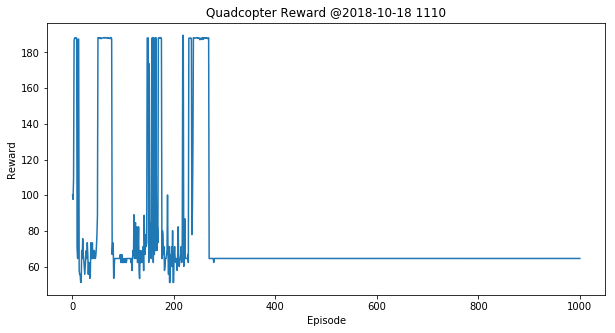

In [19]:
title = ''.join(str(datetime.now()).split(':')[:-1])
timestamp = re.sub(r'[- ]','',title)
memo = ''

# Print reward per episode
plt.figure(figsize=(10,5))
plt.plot(stats_selected['Reward'])
plt.title("Quadcopter Reward @{}".format(title))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: the agent is learning how to take of where the initial position is desribed by x,y,z coordinates equal to [0,0,10] and in the end it's supposed to achieve the target of [0,0,50]

The reward function equals: np.tanh(1 - 0.001*(abs(self.sim.pose[:3] - self.target_pos)).sum())

The agent gets a reward between -1 and 1 in each step of the each episode according to its difference between both positions.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: unfortunately I didn't have enough time to be more creative here and I used the suggested DDPG algorithm. Most of my code was re-used as it was originally given. The only differences were slight adjustments to the NNs.

Generally speaking a pretty standard setup was applied to both actor and critical models: 512 and 256 cells respectively in both 2 dense layers. Additionally, regularizes, batch normalization and relu activation were used. Random uniform initializer is used in used to combat the gradients vanishing problem. Finally, I used Adam optimizer with a default learning rate of 0.001.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: I have an impression that my drone wouldn't really be able to fly in reality, or promptly take off and then quickly crash on the ground... ;) it was reaching a good solution a couple times in the very beginnig but the rewards profile has a lot of variance - it seems as if it couldn't properly remember the good solution and learn. then suddenly around episode 300 it crashed on the ground and wasn't able improve on the score untill the end. Perhaps the drone got stuck in a local optimum?

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: honestly this project was extremely difficult for me from the start and was beyond my learning expectations from a Deep Learning course. I think also the main difficulty was coming from the fact that there are not so many materials and references available as they are for e.g. Keras / Tensorflow models/ frameworks. I think you guys could consider perhaps lowering the amount of content on this last module to make is a little bit more enjoyable as the last step of the course.

I found it interesting to see how the learning process is sensitive to changing the input parameters. These tasks seem way more complicated that more classical Machine Learning tasks. Unfortunately I didn't have more time to work on this project and I tried to do my best within the time I had available after working hours ;)